In [21]:
%pylab inline
import pandas as pd
import sklearn.datasets
import sklearn.model_selection
import sklearn.ensemble
import skl_emeralds.confusion_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/redhog/Projects/Emerald/project-af-gruppen/env/lib/python3.8/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Train a random forrest classifier
For more details on the iris dataset and RandomForestClassifier, see
[this tutorial](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [10]:
iris = sklearn.datasets.load_iris()

In [16]:
X = iris.data[:,:4]
y = iris.target

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

In [25]:
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model

sklearn.metrics.ConfusionMatrixDisplay.from_estimator is the standard confusion matrix in SciKit Learn
We can replicate this using skl_emeralds.confusion_matrix.plot_confusion_matrix with the parameters shown below

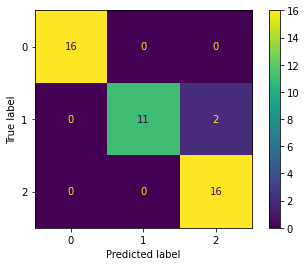

In [36]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [52]:
label_names = pd.Series(range(3), index=["Flower 0", "Flower 1", "Flower 2"])

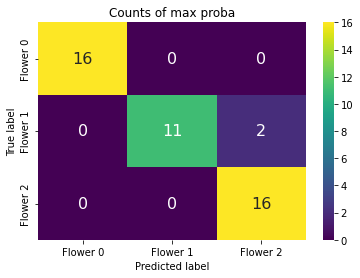

In [53]:
plt.title("Counts of max proba")
This(
    clf, X_test, y_test, label_names,
    count=True,
    norm = matplotlib.colors.Normalize())

The above only shows us the output of `clf.predict()` on X_test, compared to y_test - it only takes the maximum probability class for each input into account. To see how confused the model is, given its own knowledge about how uncertain it is, we can use `count=False`. This mode is the default, and so is a LogNorm color scale which works better for many datasets in this mode.

The values in this mode sums to 100 for each row, and could be interpreted as probabilities.

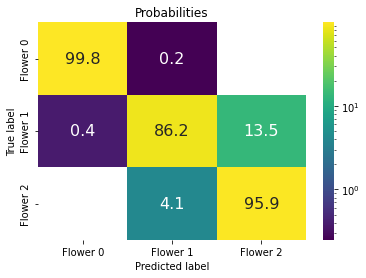

In [54]:
plt.title("Probabilities")
skl_emeralds.confusion_matrix.plot_confusion_matrix(
    clf, X_test, y_test, label_names)